# Oil Production Prediction Project. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
volve = pd.read_csv('C:/Users/Hp/Downloads/New folder/volve-field-data-main/vpd.csv')

In [3]:
volve.head(10)

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,%,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production,OP
5,12-Apr-14,7405,15/9-F-1 C,0.0,303.501,96.923,281.447,0.0,3.08702,%,22.053,8.704,22.053,0.0,0.0,0.0,NaN,production,OP
6,13-Apr-14,7405,15/9-F-1 C,0.0,303.535,96.959,276.032,0.0,1.96237,%,27.503,9.423,16.163,0.0,0.0,0.0,NaN,production,OP
7,14-Apr-14,7405,15/9-F-1 C,0.0,303.782,96.969,282.787,0.0,0.00000,%,20.996,8.131,20.737,0.0,0.0,0.0,NaN,production,OP
8,15-Apr-14,7405,15/9-F-1 C,0.0,303.858,97.021,289.941,0.0,31.14186,%,13.918,8.498,12.182,0.0,0.0,0.0,NaN,production,OP
9,16-Apr-14,7405,15/9-F-1 C,0.0,303.792,97.066,299.672,0.0,0.00000,%,4.120,8.821,1.490,0.0,0.0,0.0,NaN,production,OP


In [4]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   ON_STREAM_HRS             15349 non-null  float64
 4   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 6   AVG_DP_TUBING             8980 non-null   float64
 7   AVG_ANNULUS_PRESS         7890 non-null   float64
 8   AVG_CHOKE_SIZE_P          8919 non-null   float64
 9   AVG_CHOKE_UOM             9161 non-null   object 
 10  AVG_WHP_P                 9155 non-null   float64
 11  AVG_WHT_P                 9146 non-null   float64
 12  DP_CHOKE_SIZE             15340 non-null  float64
 13  BORE_OIL_VOL              9161 non-null   float64
 14  BORE_G

<AxesSubplot:>

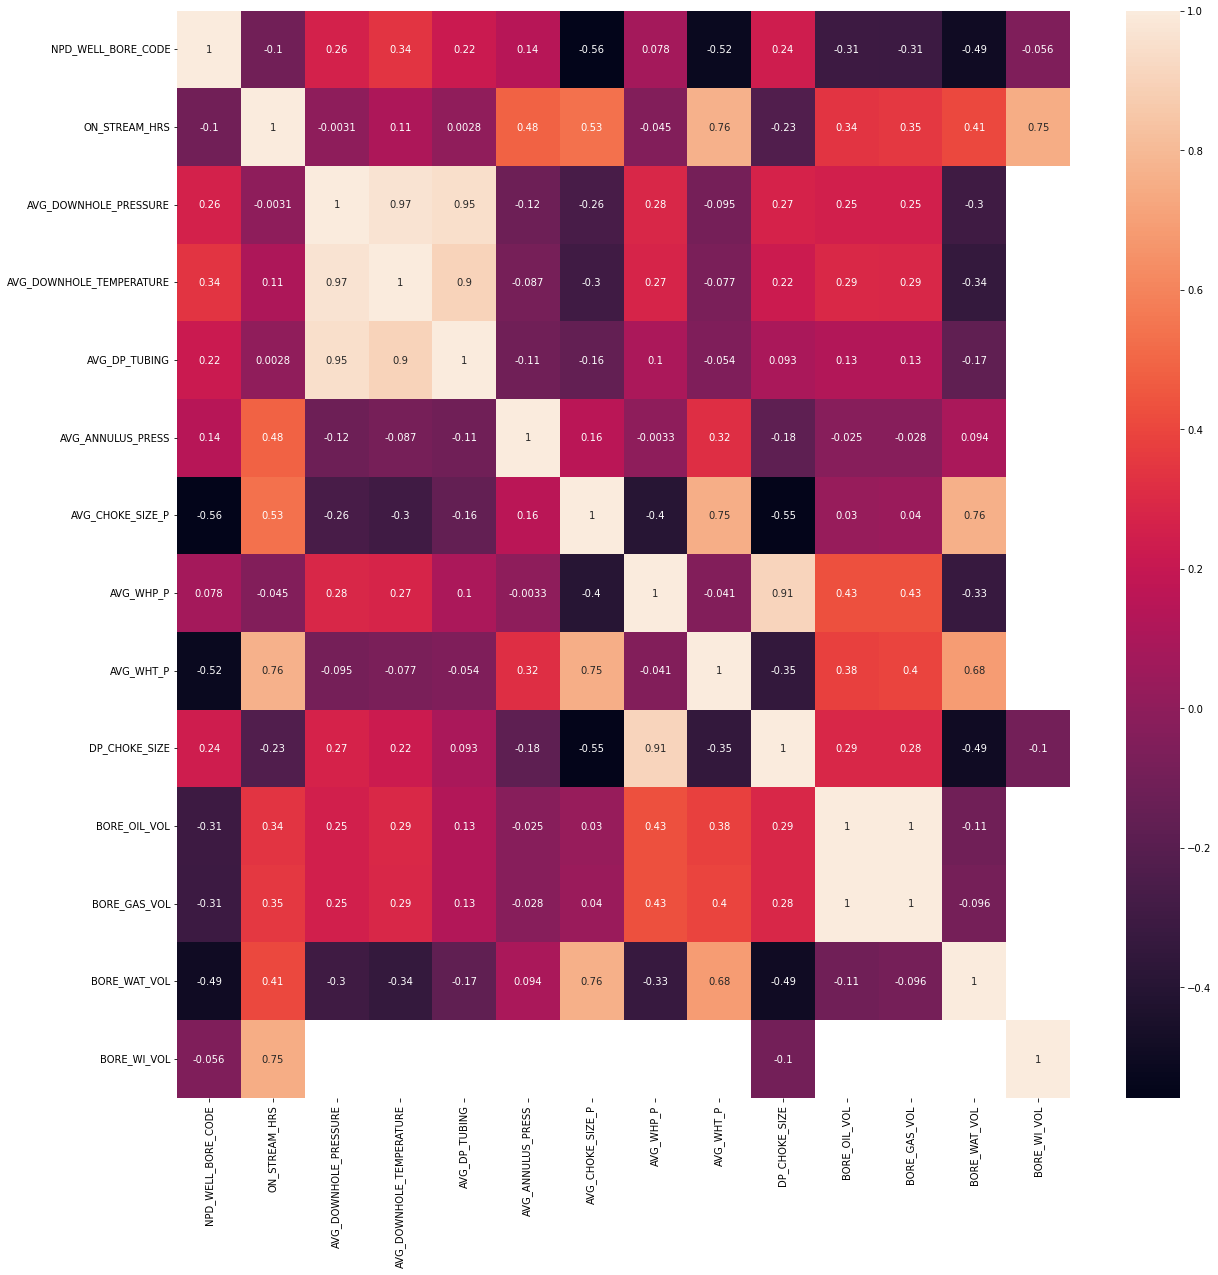

In [5]:
corrmat = volve.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
sns.heatmap(volve[top_corr_features].corr(),annot=True)

In [6]:
# Filter rows where BORE_OIL_VOL is not equal to zero
volve= volve[volve['BORE_OIL_VOL'] != 0]

# Select the desired columns
volve = volve[['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'AVG_WHP_P', 'DP_CHOKE_SIZE', 'AVG_ANNULUS_PRESS', 'ON_STREAM_HRS', 'AVG_WHT_P', 'BORE_OIL_VOL']]


In [7]:
selected_columns = ['AVG_DOWNHOLE_TEMPERATURE','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_WHP_P','DP_CHOKE_SIZE','AVG_ANNULUS_PRESS','ON_STREAM_HRS','AVG_WHT_P','BORE_OIL_VOL']


In [8]:
volve = volve.dropna(subset=selected_columns)

In [9]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6928 entries, 15 to 8927
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_TEMPERATURE  6928 non-null   float64
 1   AVG_DOWNHOLE_PRESSURE     6928 non-null   float64
 2   AVG_DP_TUBING             6928 non-null   float64
 3   AVG_WHP_P                 6928 non-null   float64
 4   DP_CHOKE_SIZE             6928 non-null   float64
 5   AVG_ANNULUS_PRESS         6928 non-null   float64
 6   ON_STREAM_HRS             6928 non-null   float64
 7   AVG_WHT_P                 6928 non-null   float64
 8   BORE_OIL_VOL              6928 non-null   float64
dtypes: float64(9)
memory usage: 541.2 KB


In [10]:
volve= volve.sample(frac=1).reset_index(drop=True)


In [11]:
selected_columns_new=['AVG_DOWNHOLE_TEMPERATURE','AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING','AVG_WHP_P','DP_CHOKE_SIZE','AVG_ANNULUS_PRESS','ON_STREAM_HRS','AVG_WHT_P']
x= volve[selected_columns_new]; y= volve['BORE_OIL_VOL']

In [12]:
x.shape, y.shape

((6928, 8), (6928,))

In [13]:
train_length = 6000 #Days

x_train , y_train = x.iloc[:train_length,:] , y[:train_length]

x_test , y_test = x.iloc[train_length:, :] , y[train_length:]

In [14]:
x_train.shape , y_train.shape ,  x_test.shape , y_test.shape

((6000, 8), (6000,), (928, 8), (928,))

In [15]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6928 entries, 0 to 6927
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_TEMPERATURE  6928 non-null   float64
 1   AVG_DOWNHOLE_PRESSURE     6928 non-null   float64
 2   AVG_DP_TUBING             6928 non-null   float64
 3   AVG_WHP_P                 6928 non-null   float64
 4   DP_CHOKE_SIZE             6928 non-null   float64
 5   AVG_ANNULUS_PRESS         6928 non-null   float64
 6   ON_STREAM_HRS             6928 non-null   float64
 7   AVG_WHT_P                 6928 non-null   float64
 8   BORE_OIL_VOL              6928 non-null   float64
dtypes: float64(9)
memory usage: 487.2 KB


## 1.Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

yp_train2 = rf.predict(x_train)

yp_test2 = rf.predict(x_test)

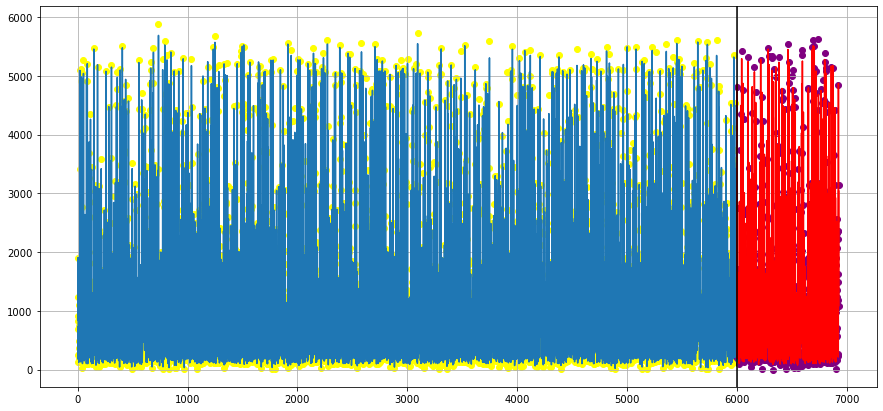

In [17]:
plt.figure(figsize=(15,7))

plt.scatter(volve.index[:train_length] , y_train, color='yellow')
plt.plot(volve.index[:train_length] , yp_train2)

plt.scatter(volve.index[train_length:] , y_test, color='purple')
plt.plot(volve.index[train_length:] , yp_test2, color='red')


plt.axvline(volve.index[train_length], color='black')


plt.grid()

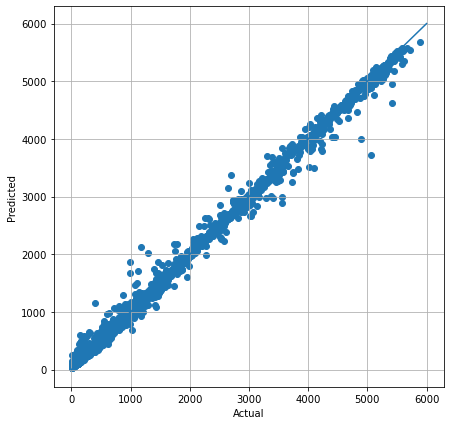

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(y_train,yp_train2)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.plot([0,6000],[0,6000])

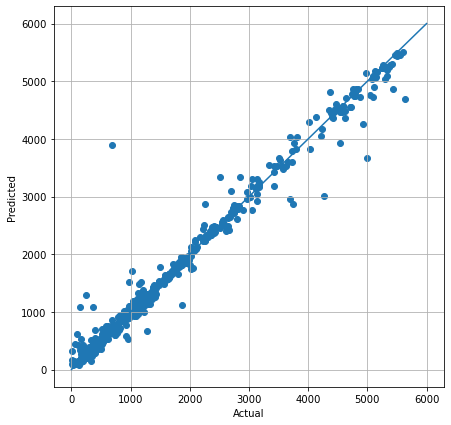

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,yp_test2)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.plot([0,6000],[0,6000])

In [20]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_train, yp_train2)
mse = mean_squared_error(y_train, yp_train2)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Square root Error:', rmse)
print("R2 score:", r2)

Mean Squared Error: 4394.354680836458
Mean Square root Error: 66.28992895483037
R2 score: 0.9971935548483576


In [21]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_test, yp_test2)
mse = mean_squared_error(y_test, yp_test2)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Square root Error:', rmse)
print("R2 score:", r2)

Mean Squared Error: 30591.576036652168
Mean Square root Error: 174.90447689139398
R2 score: 0.9820904643157125


## 2.Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [23]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [24]:
yp_train4 = gb.predict(x_train)
yp_test4 = gb.predict(x_test)

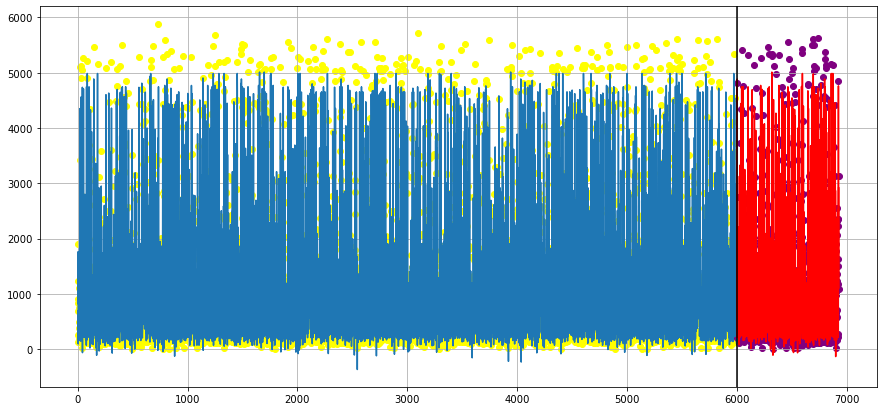

In [25]:
plt.figure(figsize=(15,7))

plt.scatter(volve.index[:train_length] , y_train, color='yellow')
plt.plot(volve.index[:train_length] , yp_train4)

plt.scatter(volve.index[train_length:] , y_test, color='purple')
plt.plot(volve.index[train_length:] , yp_test4, color='red')


plt.axvline(volve.index[train_length], color='black')

plt.grid()

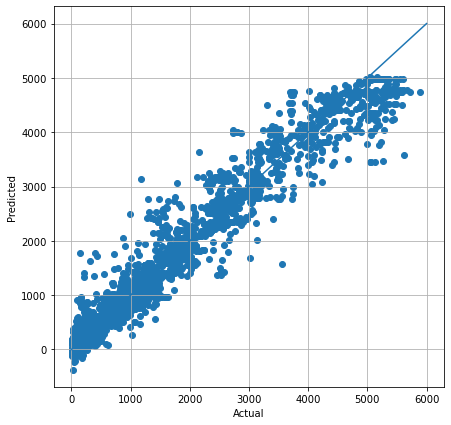

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(y_train,yp_train4)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.plot([0,6000],[0,6000])

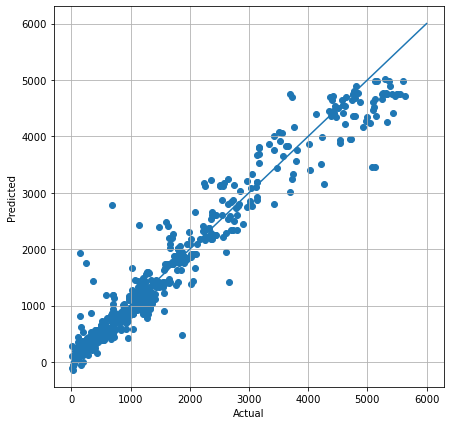

In [27]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,yp_test4)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.plot([0,6000],[0,6000])

In [28]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_train, yp_train4)
mse = mean_squared_error(y_train, yp_train4)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Square root Error:', rmse)
print("R2 score:", r2)

Mean Squared Error: 60299.576593928854
Mean Square root Error: 245.55972103325263
R2 score: 0.9614898052912956


In [29]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_test, yp_test4)
mse = mean_squared_error(y_test, yp_test4)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Square root Error:', rmse)
print("R2 score:", r2)

Mean Squared Error: 77337.78990059157
Mean Square root Error: 278.0967275977759
R2 score: 0.9547233556614052


## 3.Artificial Neural Network(ANN)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model = models.Sequential()

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 2s 4ms/step - loss: 2243971.7500 - val_loss: 875535.8125
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 698403.0000 - val_loss: 725333.2500
Epoch 3/100
150/150 [==============================] - 0s 3ms/step - loss: 585382.3125 - val_loss: 627202.4375
Epoch 4/100
150/150 [==============================] - 0s 3ms/step - loss: 501017.7188 - val_loss: 541091.7500
Epoch 5/100
150/150 [==============================] - 0s 3ms/step - loss: 419357.9062 - val_loss: 472407.3750
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 341289.5938 - val_loss: 363964.1562
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 275013.1875 - val_loss: 297134.0938
Epoch 8/100
150/150 [==============================] - 0s 3ms/step - loss: 224562.2188 - val_loss: 249118.5000
Epoch 9/100
150/150 [==============================] - 0s 3ms/step - loss: 195914.8594 - val_loss: 221359.7188


150/150 [==============================] - 0s 3ms/step - loss: 46435.2109 - val_loss: 80799.4375
Epoch 76/100
150/150 [==============================] - 0s 3ms/step - loss: 44993.8281 - val_loss: 67375.0938
Epoch 77/100
150/150 [==============================] - 0s 3ms/step - loss: 45548.4844 - val_loss: 60858.4141
Epoch 78/100
150/150 [==============================] - 0s 3ms/step - loss: 46642.3672 - val_loss: 62715.2930
Epoch 79/100
150/150 [==============================] - 0s 3ms/step - loss: 44345.2461 - val_loss: 61679.4453
Epoch 80/100
150/150 [==============================] - 0s 3ms/step - loss: 43982.1406 - val_loss: 61341.6016
Epoch 81/100
150/150 [==============================] - 0s 3ms/step - loss: 44125.2539 - val_loss: 70323.3750
Epoch 82/100
150/150 [==============================] - 0s 3ms/step - loss: 42951.0352 - val_loss: 62371.7383
Epoch 83/100
150/150 [==============================] - 0s 3ms/step - loss: 42838.5977 - val_loss: 60923.0742
Epoch 84/100
150/150 [=

In [31]:
yp_train3= model.predict(X_train_scaled)
yp_test3 = model.predict(X_test_scaled)

29/29 [==============================] - 0s 2ms/step


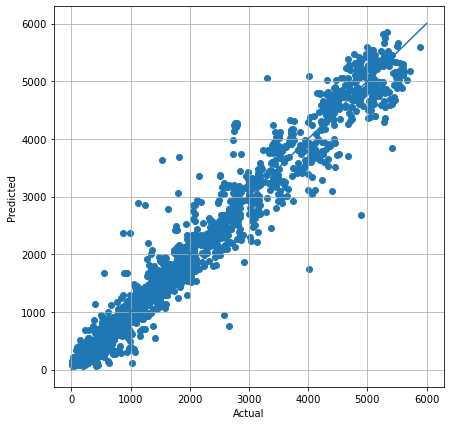

In [32]:
plt.figure(figsize=(7,7))
plt.scatter(y_train,yp_train3)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.plot([0,6000],[0,6000])

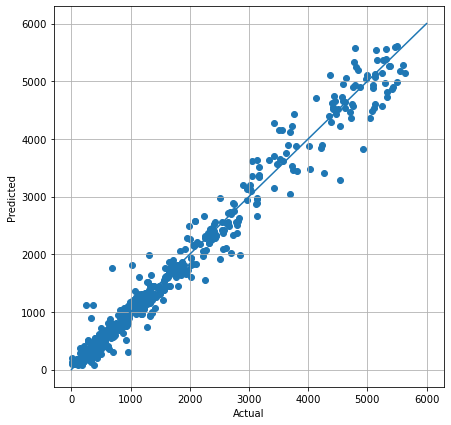

In [33]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,yp_test3)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.grid()
plt.plot([0,6000],[0,6000])

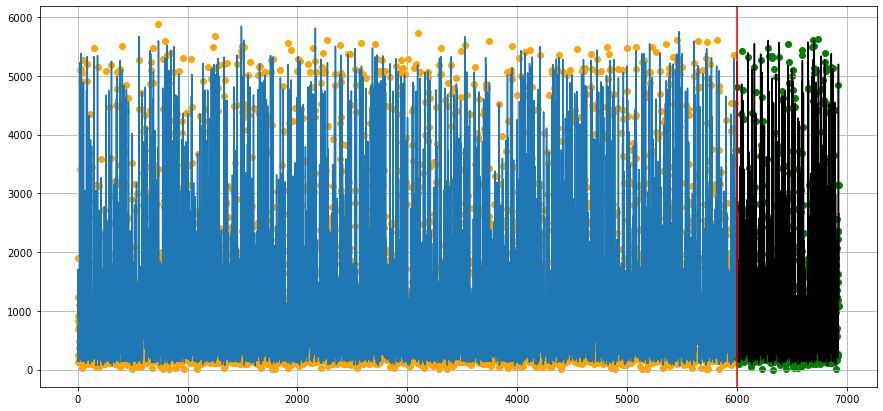

In [34]:
plt.figure(figsize=(15,7))
plt.scatter(volve.index[:train_length] , y_train, color='orange')
plt.plot(volve.index[:train_length] , yp_train3)

plt.scatter(volve.index[train_length:] , y_test, color='green')
plt.plot(volve.index[train_length:] , yp_test3, color='black')


plt.axvline(volve.index[train_length], color='red')


plt.grid()

In [35]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_train, yp_train3)
mse = mean_squared_error(y_train, yp_train3)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Square root Error:', rmse)
print("R2 score:", r2)

Mean Squared Error: 39606.03222276926
Mean Square root Error: 199.01264337415665
R2 score: 0.9747056928308244


In [36]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(y_test, yp_test3)
mse = mean_squared_error(y_test, yp_test3)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Square root Error:', rmse)
print("R2 score:", r2)

Mean Squared Error: 36242.16352947363
Mean Square root Error: 190.37374695444126
R2 score: 0.9787823837441646
